# 2do Examen Parcial
https://www.kaggle.com/datasets/jakeshbohaju/brain-tumor

## Zaira Valentina Avila Lazcano

Usar los métodos de ML no supervisado en: (k-means, Gaussian mixture, cluster jerárquico)

1. Dataset de Coactivation matrix
    - Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
    - Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

1. Brain tumor
    1. Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)
    1. Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth
    1. ¿qué método recomendarías para este dataset?, ¿por qué?

1. De su previa investigación:
    - qué es precision?
    - qué es accuracy?
    - qué es recall?
    - qué es f1-score?

1. cómo se relacionan las definiciones anteriores a la matriz de confusión?

1. a partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score


## 1. Dataset de Coactivation matrix

- Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)

In [234]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [235]:
mat = scipy.io.loadmat('/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S03_datasets/coactivation_matrix/Coactivation_matrix.mat')
coactivation_matrix = mat['Coactivation_matrix']

In [236]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(coactivation_matrix)

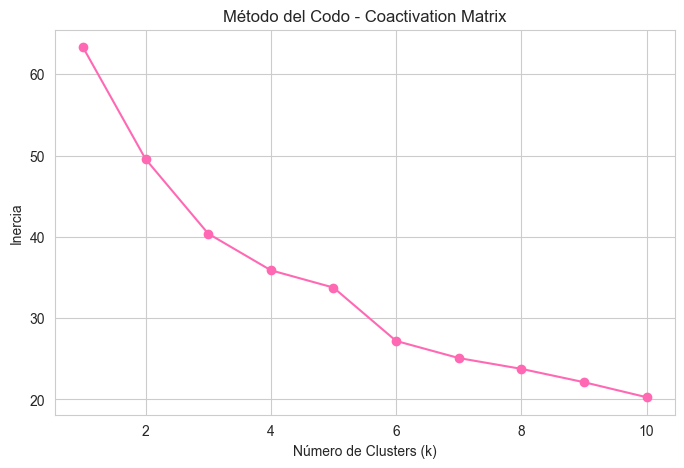

In [237]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', color='hotpink')
plt.title('Método del Codo - Coactivation Matrix')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

- Usando el número de clusters encontrado por el método del codo, usar k-means y gaussian mixture en este dataset

In [238]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

gmm = GaussianMixture(n_components=k, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

# Mostrar primeras etiquetas
print("Etiquetas KMeans:", kmeans_labels[:10])
print("Etiquetas GMM:", gmm_labels[:10])

Etiquetas KMeans: [1 1 1 1 1 0 0 2 1 1]
Etiquetas GMM: [1 1 0 0 1 0 0 2 1 1]


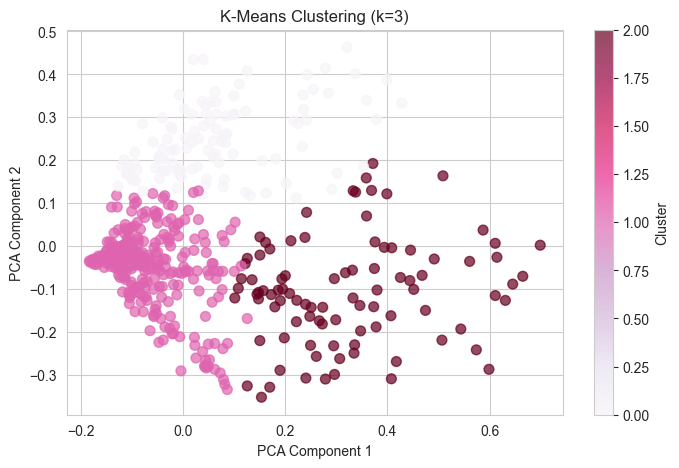

In [239]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='PuRd', s=50, alpha=0.7)
plt.title('K-Means Clustering (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

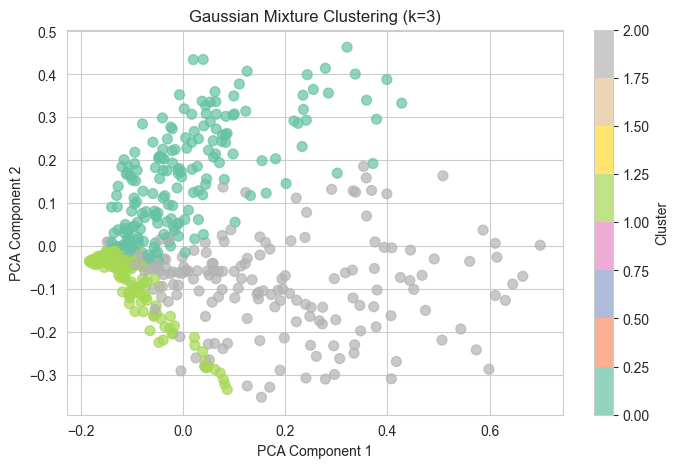

In [240]:
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Set2', s=50, alpha=0.7)
plt.title('Gaussian Mixture Clustering (k=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


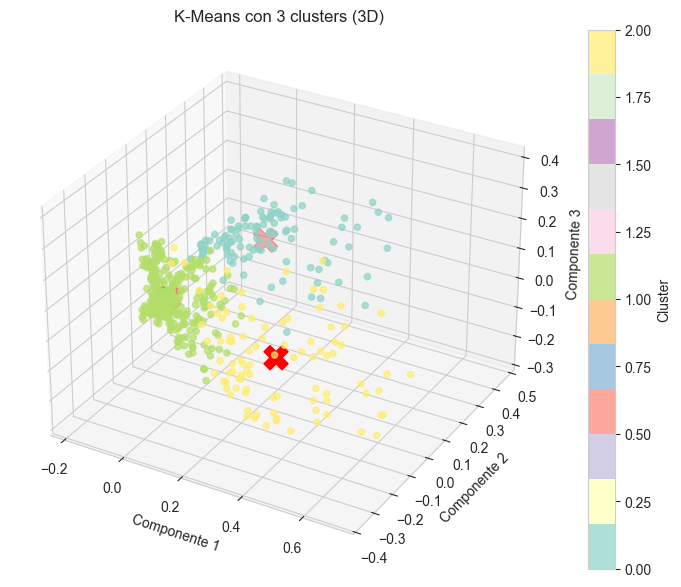

In [241]:

no_clusters = 3
kmeans = KMeans(n_clusters=no_clusters, random_state=42)
kmeans.fit(X_pca)

mat['kmeans'] = kmeans.labels_
clusters_df = kmeans.cluster_centers_

gmm = GaussianMixture(n_components=no_clusters, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter_kmeans = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=mat['kmeans'], cmap='Set3', alpha=0.7)
ax.scatter(clusters_df[:, 0], clusters_df[:, 1], clusters_df[:, 2], marker='X', color='r', s=300)  # Centroides
ax.set_title(f'K-Means con {no_clusters} clusters (3D)')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
fig.colorbar(scatter_kmeans, label='Cluster')
plt.show()


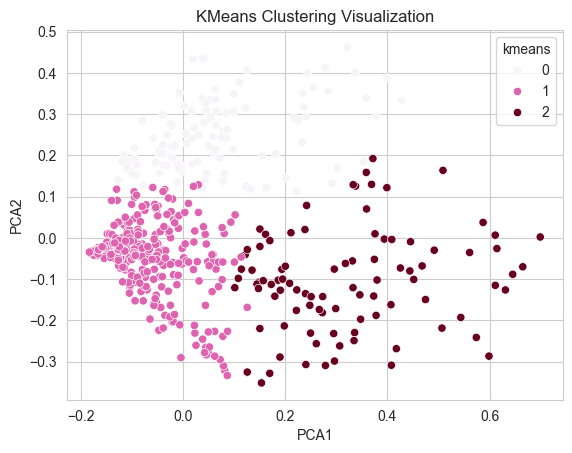

In [242]:
import seaborn as sns
import pandas as pd
df_pca = pd.DataFrame(X_pca[:, :2], columns=['PCA1', 'PCA2'])
df_pca['kmeans'] = kmeans_labels

sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='kmeans', palette='PuRd')
plt.title('KMeans Clustering Visualization')
plt.show()

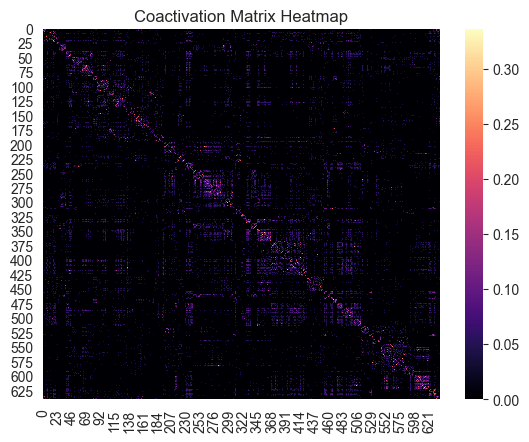

In [243]:
sns.heatmap(coactivation_matrix, cmap='magma', cbar=True)
plt.title('Coactivation Matrix Heatmap')
plt.show()

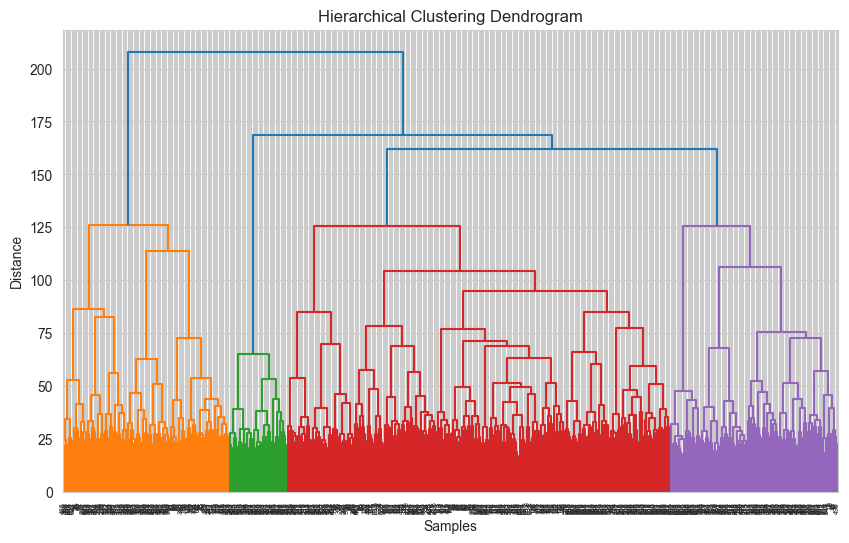

In [244]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

X_std = StandardScaler().fit_transform(coactivation_matrix)
Z = linkage(X_std, 'ward')

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

## 2. Brain tumor

- Utilizar el método de codo para determinar el número de cluster óptimo (adecuado)

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

In [246]:

df = pd.read_csv('/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv')

In [247]:
y_true = df['Class'].values

In [248]:
X = df.drop(columns=['Class'])
X = X.select_dtypes(include=[np.number]) 

In [249]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

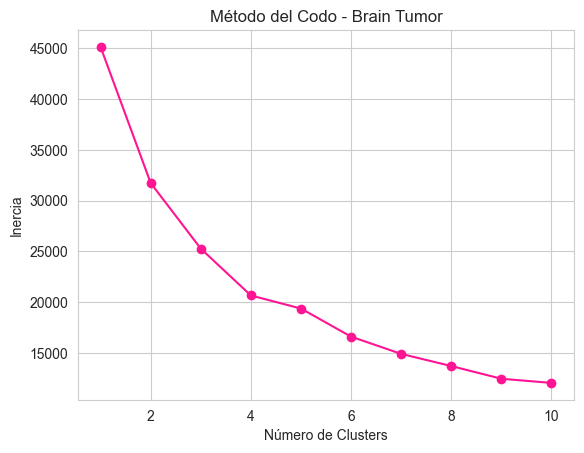

In [250]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o', color='deeppink')
plt.title('Método del Codo - Brain Tumor')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

- Utilizar 2 cluster con cada método (k-means, gaussian clusters y cluster jerárquico) y calcular la matriz de confusión de cada método usando la columna 'Class' como groundthruth

In [251]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
gmm = GaussianMixture(n_components=k, random_state=42).fit_predict(X_scaled)
hier = AgglomerativeClustering(n_clusters=k).fit_predict(X_scaled)

In [252]:
def corregir_labels(y_true, y_pred):
    return y_pred if accuracy_score(y_true, y_pred) >= accuracy_score(y_true, 1 - y_pred) \
        else 1 - y_pred

In [253]:
def evaluar(y_true, y_pred, metodo):
    y_pred_corr = corregir_labels(y_true, y_pred)
    print(f"\n--- {metodo} ---")
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred_corr))
    print("Accuracy:", accuracy_score(y_true, y_pred_corr))
    print("Precision:", precision_score(y_true, y_pred_corr))
    print("Recall:", recall_score(y_true, y_pred_corr))
    print("F1-score:", f1_score(y_true, y_pred_corr))

In [254]:
evaluar(y_true, kmeans, "K-Means")



--- K-Means ---
Matriz de Confusión:
 [[1978  101]
 [  80 1603]]
Accuracy: 0.9518872939925571
Precision: 0.9407276995305164
Recall: 0.952465834818776
F1-score: 0.9465603779155595


In [255]:
evaluar(y_true, gmm, "Gaussian Mixture")



--- Gaussian Mixture ---
Matriz de Confusión:
 [[2056   23]
 [  60 1623]]
Accuracy: 0.9779372674109517
Precision: 0.9860267314702309
Recall: 0.964349376114082
F1-score: 0.9750675878642235


In [256]:

evaluar(y_true, hier, "Clustering Jerárquico")


--- Clustering Jerárquico ---
Matriz de Confusión:
 [[2053   26]
 [  94 1589]]
Accuracy: 0.9681020733652312
Precision: 0.9839009287925696
Recall: 0.9441473559120618
F1-score: 0.9636143117040631


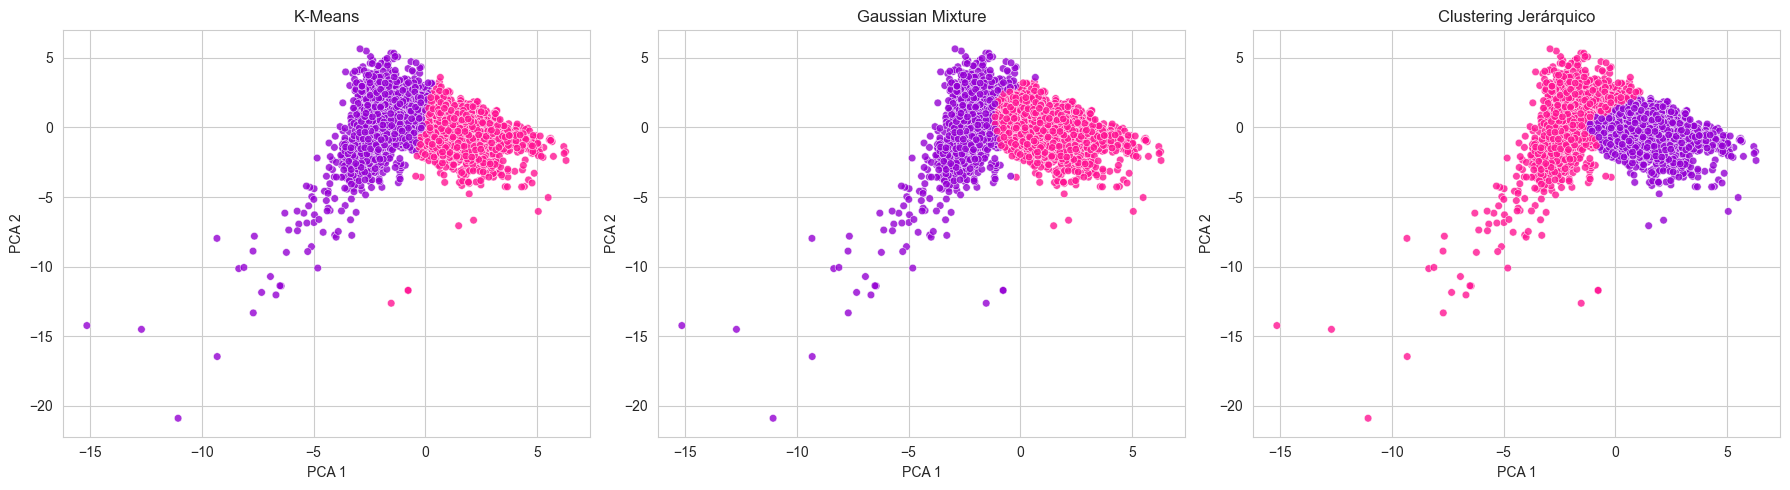

In [257]:
from sklearn.decomposition import PCA
import seaborn as sns


pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)


kmeans = KMeans(n_clusters=k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_pca)

gmm = GaussianMixture(n_components=k, random_state=42)
labels_gmm = gmm.fit_predict(X_pca)


hier = AgglomerativeClustering(n_clusters=k)
labels_hier = hier.fit_predict(X_pca)


methods = ['K-Means', 'Gaussian Mixture', 'Clustering Jerárquico']
label_sets = [labels_kmeans, labels_gmm, labels_hier]
paleta_col = ['deeppink', 'darkviolet']

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, method, labels in zip(axes, methods, label_sets):
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1],
        hue=labels, palette=paleta_col, ax=ax, legend=False, s=30, alpha=0.8
    )
    ax.set_title(f'{method}')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()


In [258]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [259]:
df = pd.read_csv('/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv')

y_true = df['Class'].values

X = df.drop(columns=['Class'])
X = X.select_dtypes(include=[np.number])  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

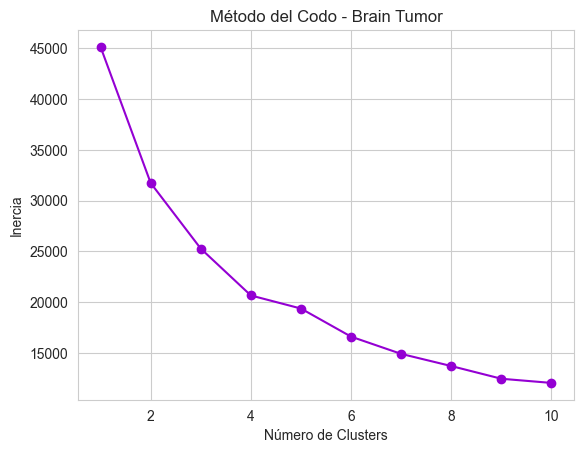

In [260]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o', color='darkviolet')
plt.title('Método del Codo - Brain Tumor')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

In [261]:
k = 2
kmeans_labels = KMeans(n_clusters=k, random_state=42).fit_predict(X_scaled)
gmm_labels = GaussianMixture(n_components=k, random_state=42).fit_predict(X_scaled)
hier_labels = AgglomerativeClustering(n_clusters=k).fit_predict(X_scaled)

In [262]:
def corregir_labels(y_true, y_pred):
    return y_pred if accuracy_score(y_true, y_pred) >= accuracy_score(y_true, 1 - y_pred) else 1 - y_pred


In [263]:
def evaluar(y_true, y_pred, metodo):
    y_pred_corr = corregir_labels(y_true, y_pred)
    print(f"\n--- {metodo} ---")
    print("Matriz de Confusión:\n", confusion_matrix(y_true, y_pred_corr))
    print("Accuracy:", accuracy_score(y_true, y_pred_corr))
    print("Precision:", precision_score(y_true, y_pred_corr, average='macro'))
    print("Recall:", recall_score(y_true, y_pred_corr, average='macro'))
    print("F1-score:", f1_score(y_true, y_pred_corr, average='macro'))

In [264]:
evaluar(y_true, kmeans_labels, "K-Means")



--- K-Means ---
Matriz de Confusión:
 [[1978  101]
 [  80 1603]]
Accuracy: 0.9518872939925571
Precision: 0.9509275037983
Recall: 0.9519423931188637
F1-score: 0.9514044335794862


In [265]:
evaluar(y_true, gmm_labels, "Gaussian Mixture")


--- Gaussian Mixture ---
Matriz de Confusión:
 [[2056   23]
 [  60 1623]]
Accuracy: 0.9779372674109517
Precision: 0.9788356719733007
Recall: 0.9766431825255355
F1-score: 0.9776410644923025


In [266]:

evaluar(y_true, hier_labels, "Clustering Jerárquico")


--- Clustering Jerárquico ---
Matriz de Confusión:
 [[2053   26]
 [  94 1589]]
Accuracy: 0.9681020733652312
Precision: 0.9700594536836625
Recall: 0.9658206717030247
F1-score: 0.9676093328515583


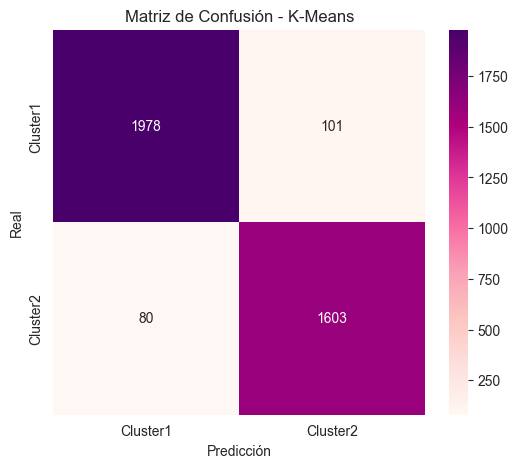

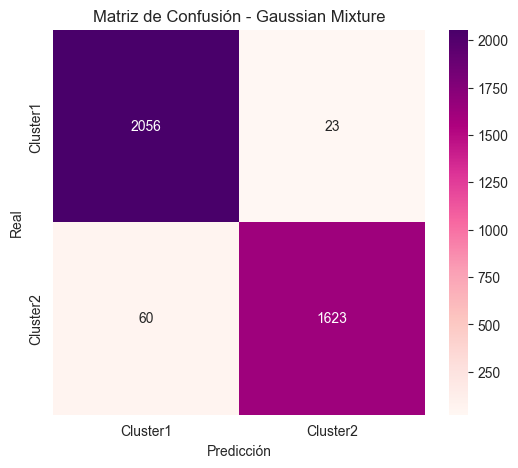

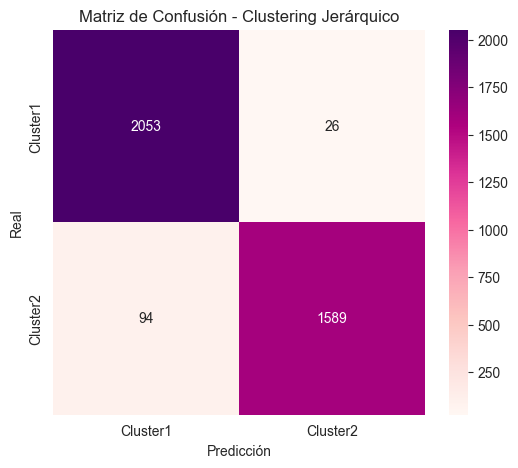

In [267]:
def visualizar_matriz(y_true, y_pred_corr, metodo):
    cm = confusion_matrix(y_true, y_pred_corr)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="RdPu",
                xticklabels=['Cluster1', 'Cluster2'], yticklabels=['Cluster1', 'Cluster2'])
    plt.title(f"Matriz de Confusión - {metodo}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

visualizar_matriz(y_true, corregir_labels(y_true, kmeans_labels), "K-Means")
visualizar_matriz(y_true, corregir_labels(y_true, gmm_labels), "Gaussian Mixture")
visualizar_matriz(y_true, corregir_labels(y_true, hier_labels), "Clustering Jerárquico")


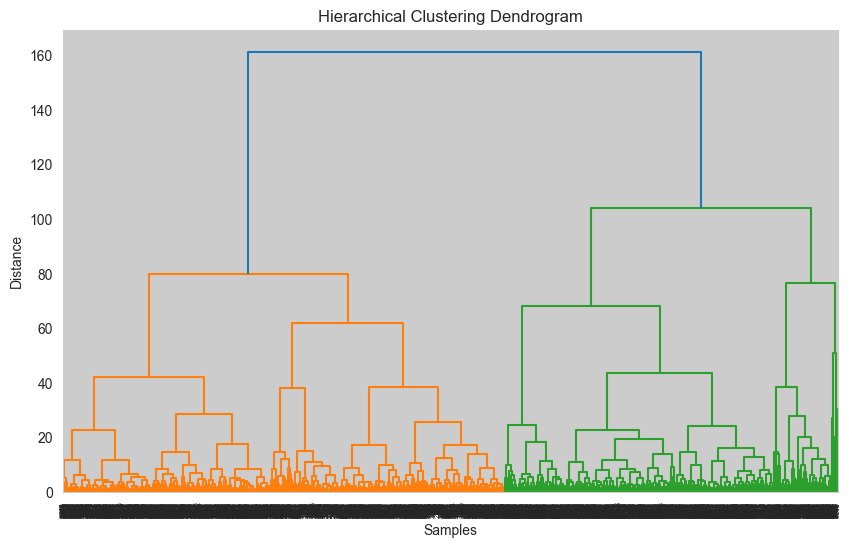

In [268]:
Z = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

- ¿Qué método recomendarías para este dataset?, ¿por qué?



Gaussian Mixture es el método más adecuado para este dataset. Su capacidad para manejar clusters con formas complejas y su desempeño superior en todas las métricas lo convierten en una opción ideal, especialmente en un contexto médico donde la precisión es fundamental.


Gaussian Mixture Model (GMM)
Este método supera al K-Means en todas las métricas clave:

Accuracy: 97.79%, evidenciando una clasificación más precisa.

Precision: 98.60%, lo que sugiere que GMM hace menos falsas predicciones positivas.

Recall: 96.43%, demostrando que puede identificar la mayoría de los positivos reales, aunque es ligeramente menor que el precision.

F1-score: 97.51%, lo que refleja un excelente equilibrio entre precisión y recall.

La matriz de confusión revela que GMM comete menos errores que K-Means, con únicamente 23 falsos positivos y 60 falsos negativos. 

-De su previa investigación:

    - ¿Qué es precision?

    - ¿Qué es accuracy?

    - ¿Qué es recall?

    - ¿Qué es f1-score?
    

- qué es precision?
Precisión (Precision):
Definición: Mide qué tan confiables son las predicciones positivas de un modelo. De todos los elementos clasificados como positivos, ¿cuántos realmente son positivos?
La precisión mide la proporción de predicciones positivas verdaderas (VP) entre todas las predicciones positivas (VP + falsos positivos (FP)) realizadas por el modelo.

Fórmula: Precisión = TP / (TP + FP)

- qué es accuracy?
Exactitud (Accuracy):
Definición: Representa la proporción de predicciones correctas (positivas y negativas) sobre el total de observaciones.
La precisión cuantifica la proporción de instancias clasificadas correctamente (tanto verdaderos positivos como verdaderos negativos) en relación con el número total de instancias.

Fórmula: Precisión = (VP + verdaderos negativos (VN)) / (VP + VN + FP + falsos negativos (FN))


- qué es recall?
Sensibilidad o Exhaustividad (Recall):
Definición: Mide cuántos casos positivos reales fueron identificados correctamente por el modelo.
La recuperación, también conocida como sensibilidad, mide la capacidad de un modelo para identificar correctamente todas las instancias positivas verdaderas en el conjunto de datos.

Fórmula: Recordatorio = TP / (TP + FN)

- qué es f1-score?
F1-Score:
Definición: Es la media armónica entre precisión y recall. Es útil en casos donde hay un desbalance entre clases, ya que combina ambas métricas en una sola.

La puntuación F1 es la media armónica de precisión y recuperación, y proporciona una métrica única que equilibra tanto la precisión como la recuperación.

Fórmula: Puntuación F1 = 2 * (Precisión * Recordatorio) / (Precisión + Recordatorio)

- ¿Cómo se relacionan las definiciones anteriores a la matriz de confusión?

Relación con la Matriz de Confusión:

- Matriz de confusión: Una matriz de confusión es una tabla que se utiliza para evaluar el rendimiento de un modelo de clasificación. Incluye:

- Verdaderos positivos (TP: instancias positivas predichas correctamente)

- Verdaderos negativos (NT: instancias negativas predichas correctamente)

- Falsos positivos (FP: instancias positivas predichas incorrectamente)

- Falsos negativos (FN: instancias negativas predichas incorrectamente)

Métricas derivadas de la matriz de confusión:

- Precisión: derivada de TP y FP

- Precisión: derivada de TP, TN, FP y FN

- Recordatorio: Derivado de TP y FN

- Puntuación F1: combina precisión y recuperación, ambas derivadas de TP, FP y FN

5. A partir del resultado de 2.B, calcular precision, accuracy, recall y f1-score

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [270]:
df = pd.read_csv('/Users/ZvalEnes/Desktop/Neurociencias-2025-2/S03_datasets/Brain_tumor/Brain Tumor.csv')

y_true = df['Class'].values

X = df.drop(columns=['Class'])
X = X.select_dtypes(include=[np.number])  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [271]:
kmeans_labels = KMeans(n_clusters=2, random_state=42).fit_predict(X_scaled)
gmm_labels = GaussianMixture(n_components=2, random_state=42).fit_predict(X_scaled)
hier_labels = AgglomerativeClustering(n_clusters=2).fit_predict(X_scaled)


In [272]:
def corregir_labels(y_true, y_pred):
    return y_pred if accuracy_score(y_true, y_pred) >= accuracy_score(y_true, 1 - y_pred) \
        else 1 - y_pred


In [273]:
def calcular_métricas(y_true, y_pred, metodo):
    y_pred_corr = corregir_labels(y_true, y_pred)  
    cm = confusion_matrix(y_true, y_pred_corr)  

    
    precision = precision_score(y_true, y_pred_corr, average='macro')
    accuracy = accuracy_score(y_true, y_pred_corr)
    recall = recall_score(y_true, y_pred_corr, average='macro')
    f1 = f1_score(y_true, y_pred_corr, average='macro')

    
    print(f"\n--- Métricas para {metodo} ---")
    print("Matriz de Confusión:\n", cm)
    print(f"Precisión: {precision:.2f}")
    print(f"Exactitud: {accuracy:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")

    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="BuPu",
                xticklabels=['Cluster1', 'Cluster2'], yticklabels=['Cluster1', 'Cluster2'])
    plt.title(f"Matriz de Confusión - {metodo}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()


--- Métricas para K-Means ---
Matriz de Confusión:
 [[1978  101]
 [  80 1603]]
Precisión: 0.95
Exactitud: 0.95
Recall: 0.95
F1-score: 0.95


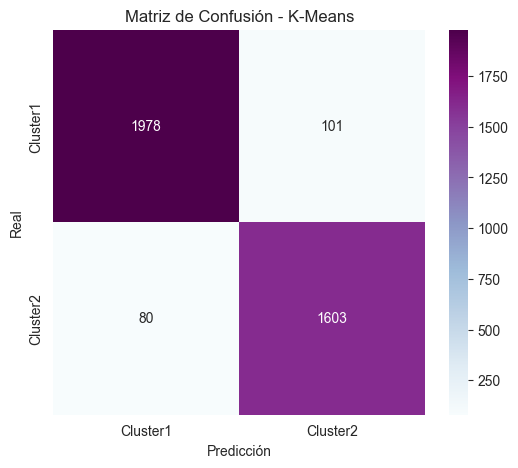

In [274]:
calcular_métricas(y_true, kmeans_labels, "K-Means")


--- Métricas para Gaussian Mixture ---
Matriz de Confusión:
 [[2056   23]
 [  60 1623]]
Precisión: 0.98
Exactitud: 0.98
Recall: 0.98
F1-score: 0.98


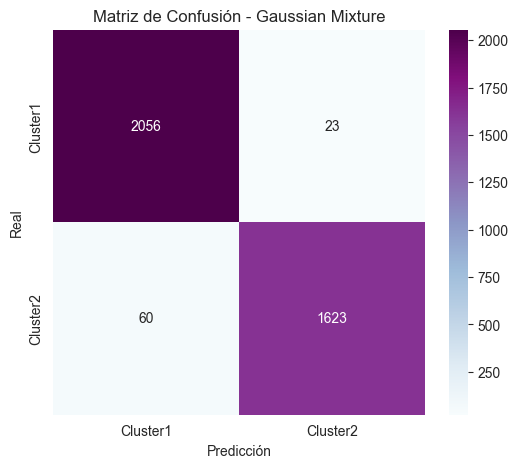

In [275]:

calcular_métricas(y_true, gmm_labels, "Gaussian Mixture")


--- Métricas para Clustering Jerárquico ---
Matriz de Confusión:
 [[2053   26]
 [  94 1589]]
Precisión: 0.97
Exactitud: 0.97
Recall: 0.97
F1-score: 0.97


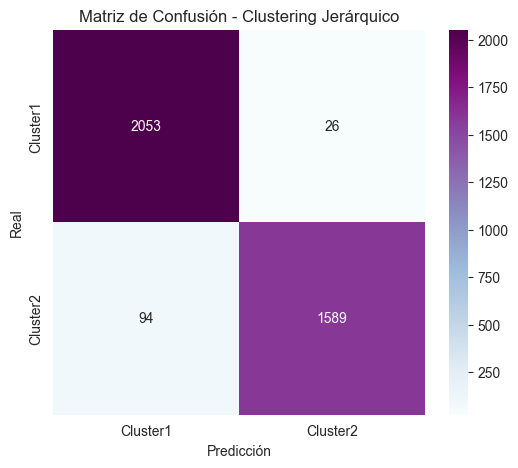

In [276]:

calcular_métricas(y_true, hier_labels, "Clustering Jerárquico")